In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [6]:
text = open("texts/genesis.txt", "r").read()
text[:200]

'ï»¿1:1: In the beginning God created the heaven and the earth.\n1:2: And the earth was without form, and void; and darkness was upon the face of the deep.  And the Spirit of God moved upon the face of '

In [7]:
# length of the text
len(text)

207289

In [8]:
txt_letters, txt_lettercnts = np.unique(list(text), return_counts=True)

# most common characters
print("most common: ", sorted(zip(txt_letters, txt_lettercnts), key=lambda x: -x[1])[:5]) 
print("least common:", sorted(zip(txt_letters, txt_lettercnts), key=lambda x: -x[1])[-5:]) 

most common:  [(' ', 38650), ('e', 18979), ('a', 13853), ('t', 13336), ('h', 13103)]
least common: [(')', 6), ('!', 2), ('»', 1), ('¿', 1), ('ï', 1)]


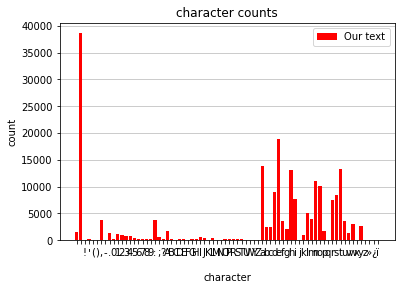

In [9]:
# character counts 
fig,ax = plt.subplots()
ax.set_axisbelow(True)
ax.yaxis.grid(color='silver')
plt.bar(txt_letters,txt_lettercnts,color='red',label="Our text")
plt.xlabel('character')
plt.ylabel('count')
plt.title('character counts')
plt.legend()
plt.show()

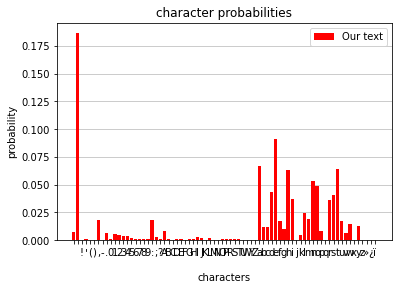

In [10]:
# character probabilities
txt_totchars = sum(txt_lettercnts)
txt_probs = [ count/txt_totchars for count in txt_lettercnts ]

fig,ax = plt.subplots()
ax.set_axisbelow(True)
ax.yaxis.grid(color='silver')
plt.bar(txt_letters, txt_probs, color='red', label="Our text")
plt.xlabel('characters')
plt.ylabel('probability')
plt.title('character probabilities')
plt.legend()
plt.show()

In [11]:
# we can take a look at the average English text

# unfortunately I only found the character probabilities for the alphabet with no distinction
# in lower or upper case characters
# source: https://gist.github.com/randallmorey/dea827d6f1c48374bdea0d2f5a320a16
# (the same numbers can be found on wikipedia: https://en.wikipedia.org/wiki/Letter_frequency)

eng_alpha_letters, eng_alpha_probs = list(zip(*np.genfromtxt("eng_probs.csv", delimiter=",", dtype=None, skip_header=True, encoding='UTF-8')))
eng_alpha_letters, eng_alpha_probs = list(eng_alpha_letters), list(eng_alpha_probs)

print("most common: ", sorted(zip(eng_alpha_letters, eng_alpha_probs), key=lambda x: -x[1])[:5])
print("least common:", sorted(zip(eng_alpha_letters, eng_alpha_probs), key=lambda x: -x[1])[-5:])


most common:  [('E', 0.12702), ('T', 0.09056), ('A', 0.08167), ('O', 0.07507), ('I', 0.06966)]
least common: [('K', 0.00772), ('J', 0.00153), ('X', 0.0015), ('Q', 0.00095), ('Z', 0.00074)]


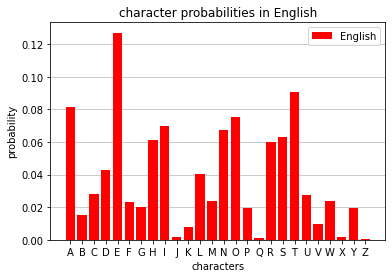

In [12]:
# plot these probabilities
fig,ax = plt.subplots()
ax.set_axisbelow(True)
ax.yaxis.grid(color='silver')
plt.bar(eng_alpha_letters, eng_alpha_probs, color='red', label="English")
plt.xlabel('characters')
plt.ylabel('probability')
plt.title('character probabilities in English')
plt.legend()
plt.show()

In [13]:
# we can now compare our text with the average English text

# first however we must only consider characters from the alphabet in our text
txt_alpha = list(filter(str.isascii, filter(str.isalpha, text.upper())))
txt_alpha_letters, txt_alpha_lettercnts = np.unique(txt_alpha, return_counts=True)
txt_alpha_totchars = sum(txt_alpha_lettercnts)
txt_alpha_probs = txt_alpha_lettercnts/txt_alpha_totchars

assert(len(txt_alpha_letters) == len(eng_alpha_letters) == 26)  
print("most commmon comparison: ")
list(zip(
    sorted(zip(txt_alpha_letters, txt_alpha_probs), key=lambda x: -x[1]), 
    sorted(zip(eng_alpha_letters, eng_alpha_probs), key=lambda x: -x[1])
    ))[:8]


most commmon comparison: 


[(('E', 0.1269659369319529), ('E', 0.12702)),
 (('A', 0.10193234805974867), ('T', 0.09056)),
 (('T', 0.08947812113069364), ('A', 0.08167)),
 (('H', 0.08732448167759951), ('O', 0.07507)),
 (('N', 0.07396137938301851), ('I', 0.06966)),
 (('O', 0.06742801443662899), ('N', 0.06749)),
 (('D', 0.06059169103506415), ('S', 0.06327)),
 (('S', 0.05731183645512263), ('H', 0.06094))]

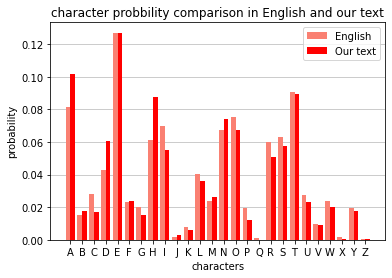

In [14]:
# we can visualise this

# assert that the txt has entries for every alpha characters
assert(len(txt_alpha_letters) == len(eng_alpha_letters) == 26)  

xaxis = np.arange(26)
barwidth = 0.4

fig,ax = plt.subplots()
ax.set_axisbelow(True)
ax.yaxis.grid(color='silver')
plt.bar(xaxis - barwidth/2, eng_alpha_probs, width=barwidth, color='salmon', label='English')
plt.bar(xaxis + barwidth/2, txt_alpha_probs, width=barwidth, color='red', label="Our text")
plt.xticks(xaxis, eng_alpha_letters)
plt.xlabel('characters')
plt.ylabel('probability')
plt.title('character probbility comparison in English and our text')
plt.legend()
plt.show()


In [15]:
#  We can also take a look at the difference between the 2

assert(len(txt_alpha_letters) == len(eng_alpha_letters) == 26)  

diff_probs = abs(np.array(eng_alpha_probs) - np.array(txt_alpha_probs))
diff_probs_noabs = np.array(eng_alpha_probs) - np.array(txt_alpha_probs)
print("3 most divergent:", sorted(zip(eng_alpha_letters, diff_probs), key=lambda x: -x[1])[:3])
print("3 least divergent:", sorted(zip(eng_alpha_letters, diff_probs), key=lambda x: -x[1])[-3:])

3 most divergent: [('H', 0.026384481677599513), ('A', 0.020262348059748664), ('D', 0.01806169103506415)]
3 least divergent: [('Q', 0.0008380370926525988), ('E', 5.4063068047088825e-05), ('Z', 2.8706235675333936e-05)]


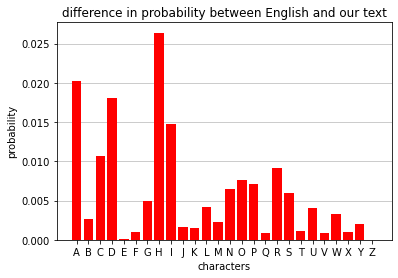

In [16]:
# visualisation

assert(len(txt_alpha_letters) == len(eng_alpha_letters) == 26)  

fig,ax = plt.subplots()
ax.set_axisbelow(True)
ax.yaxis.grid(color='silver')
plt.bar(eng_alpha_letters, diff_probs, color='red')
plt.xlabel('characters')
plt.ylabel('probability')
plt.title('difference in probability between English and our text')
plt.show()


In [17]:
# Some statistics about the difference

mu = diff_probs_noabs.mean()
sigma = diff_probs_noabs.std()
print(f"mean:     {mu}")
print(f"std:      {sigma}")


mean:     2.2692307692308128e-05
std:      0.009052278785419537


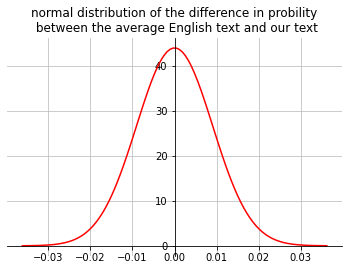

In [18]:
fig,ax = plt.subplots()
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, color='red')

ax.set_axisbelow(True)
ax.yaxis.grid(color='silver')
ax.xaxis.grid(color='silver')
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_alpha(0)
ax.spines['top'].set_alpha(0)

plt.title('normal distribution of the difference in probility\n between the average English text and our text')
plt.show()

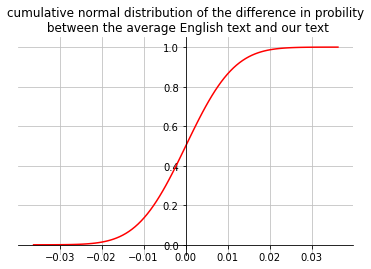

In [19]:
fig,ax = plt.subplots()
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
y = stats.norm.cdf(x, mu, sigma)
plt.plot(x, y, color='red')

ax.set_axisbelow(True)
ax.yaxis.grid(color='silver')
ax.xaxis.grid(color='silver')
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['right'].set_alpha(0)
ax.spines['top'].set_alpha(0)

plt.title('cumulative normal distribution of the difference in probility\n between the average English text and our text')
plt.show()

In [20]:
# ================================================================================================== #

In [21]:
# After doing some basic analysis of our text we would now like 
# to analyse the entropy in the text.

# (entropy is a measurement for the amount of information of a source,
#  sometimes we talk about the amount of uncertainty in the source)

In [31]:
text = open("texts/genesis.txt","r").read()
letters_t, counts_t = np.unique(list(text), return_counts=True)
probs_t = counts_t/sum(counts_t)

In [32]:
# we can calculate entropy of a text 
# from the probabilities of the characters
Hx = -sum([p*math.log2(p) for p in probs_t])
print(f"H(x)={Hx}")

H(x)=4.514668739249497


In [33]:
# what about conditional entropy

# we will work this about for memory = 2

# the formule is as follows
# H(X3|X1,X2) = negative SUM over x1,x2,x3 of p(x1,x2,x3)*log2(p(x3|x1,x2))

# the first thing we need is p(x1,x2,x3)
# we can calculate this as follows:
data = list(text)
memory = 2

ws, cnt_ws = np.unique(np.lib.stride_tricks.sliding_window_view(data, memory + 1, axis=0), return_counts=True, axis=0)
probs_ws = cnt_ws / np.sum(cnt_ws)

# this returns an array with the probability of each unique window of memory + 1 

sorted(zip(ws, probs_ws), key=lambda x: -x[1])[:10]

[(array([' ', 't', 'h'], dtype='<U1'), 0.024314115212241964),
 (array(['t', 'h', 'e'], dtype='<U1'), 0.01984687896491338),
 (array(['n', 'd', ' '], dtype='<U1'), 0.019099123437552764),
 (array(['h', 'e', ' '], dtype='<U1'), 0.01574145990824316),
 (array(['a', 'n', 'd'], dtype='<U1'), 0.013483720638534978),
 (array([' ', 'a', 'n'], dtype='<U1'), 0.012489929421526675),
 (array([',', ' ', 'a'], dtype='<U1'), 0.007733239421671402),
 (array([' ', 'o', 'f'], dtype='<U1'), 0.006768393579915769),
 (array(['o', 'f', ' '], dtype='<U1'), 0.006546479036311973),
 (array(['t', 'o', ' '], dtype='<U1'), 0.006218431450115058)]

In [34]:
# next thing we need is p(x3|x1,x2)

# we can calculate this by calculating the windows of size memory and their 
# respective probabilities
# and then dividing the probabilities of the windows of size memory + 1 
# by the probability of the the windows of size memory starting with the same n - 1 characters

# this comes down to the following:
wsb, cnt_wsb = np.unique(np.lib.stride_tricks.sliding_window_view(list(text[:-1]), memory, axis=0), return_counts=True, axis=0)
probs_wsb = cnt_wsb / sum(cnt_ws)

probs_wsc = np.zeros(len(ws))
for i, (w, p) in enumerate(zip(ws, probs_ws)):
    probs_wsc[i] = p/probs_wsb[np.where(np.all(wsb == w[:memory],axis=1))]

sorted(zip(ws, probs_wsc), key=lambda x: -x[1])[:10]

[(array(['\n', '6', ':'], dtype='<U1'), 1.0),
 (array(['\n', '7', ':'], dtype='<U1'), 1.0),
 (array(['\n', '8', ':'], dtype='<U1'), 1.0),
 (array(['\n', '9', ':'], dtype='<U1'), 1.0),
 (array([' ', 'Y', 'e'], dtype='<U1'), 1.0),
 (array([' ', 'q', 'u'], dtype='<U1'), 1.0),
 (array(['!', '\n', '1'], dtype='<U1'), 1.0),
 (array(['!', ' ', ' '], dtype='<U1'), 1.0),
 (array(['(', 'i', 's'], dtype='<U1'), 1.0),
 (array(['(', 'o', 'u'], dtype='<U1'), 1.0)]

In [35]:
# after this we can just run our formula
-np.sum(probs_ws*np.log2(probs_wsc))

2.3330159701645647

In [36]:
# now we can abstract this into a nice function

def get_entropy(data:list, memory:int):
    ws, cnt_ws = np.unique(np.lib.stride_tricks.sliding_window_view(data, memory + 1, axis=0), return_counts=True, axis=0)
    probs_ws = cnt_ws / np.sum(cnt_ws)
    
    wsb, cnt_wsb = np.unique(np.lib.stride_tricks.sliding_window_view(list(text[:-1]), memory, axis=0), return_counts=True, axis=0)
    probs_wsb = cnt_wsb / sum(cnt_ws)

    probs_wsc = np.zeros(len(ws))
    for i, (w, p) in enumerate(zip(ws, probs_ws)):
        probs_wsc[i] = p/probs_wsb[np.where(np.all(wsb == w[:memory],axis=1))]

    return -np.sum(probs_ws*np.log2(probs_wsc))
    

In [37]:
# run some examples

e = 1
i = 0
while e != 0.0:
    e = get_entropy(list(text),i)
    i = i + 1
    print(i, e)

1 4.5146687392494975
2 3.2066966428435855
3 2.3330159701645647
4 1.7008969122210866
